In [1]:
import pandas as pd
import numpy as np

# Step 1: Generate synthetic stock data
np.random.seed(42)
days = 126  # ~6 months trading days
dates = pd.date_range(start="2023-01-01", periods=days, freq="B")  # business days

# Simulate stock prices with random walk
price = 150 + np.cumsum(np.random.normal(0, 2, size=days))  # start at 150

df = pd.DataFrame({"Date": dates, "Close": price})
df.set_index("Date", inplace=True)

# Step 2: Feature Engineering
df_features = pd.DataFrame(index=df.index)
df_features["Close"] = df["Close"]

# 7-day rolling mean
df_features["rolling_mean"] = df["Close"].rolling(window=7).mean()

# 7-day percentage change
df_features["pct_change"] = df["Close"].pct_change(periods=7)

# Weekly average price (7-day rolling)
df_features["weekly_avg"] = df["Close"].rolling(window=7).mean()

# Drop NaN rows from rolling calculations
df_features = df_features.dropna()

print(df_features.head(15))


                 Close  rolling_mean  pct_change  weekly_avg
Date                                                        
2023-01-11  158.815051    154.656362    0.051801  154.656362
2023-01-12  157.876102    155.679105    0.047501  155.679105
2023-01-13  158.961222    156.671811    0.045713  156.671811
2023-01-16  158.034387    157.096961    0.019193  157.096961
2023-01-17  157.102927    157.455947    0.016255  157.455947
2023-01-18  157.586852    157.950960    0.022483  157.950960
2023-01-19  153.760291    157.448119   -0.022380  157.448119
2023-01-20  150.310456    156.233177   -0.053550  156.233177
2023-01-23  149.185881    154.991717   -0.055045  154.991717
2023-01-24  147.160218    153.305859   -0.074238  153.305859
2023-01-25  147.788713    151.842191   -0.064832  151.842191
2023-01-26  145.972665    150.252154   -0.070847  150.252154
2023-01-27  143.148058    148.189469   -0.091624  148.189469
2023-01-30  146.079355    147.092192   -0.049954  147.092192
2023-01-31  145.627802  

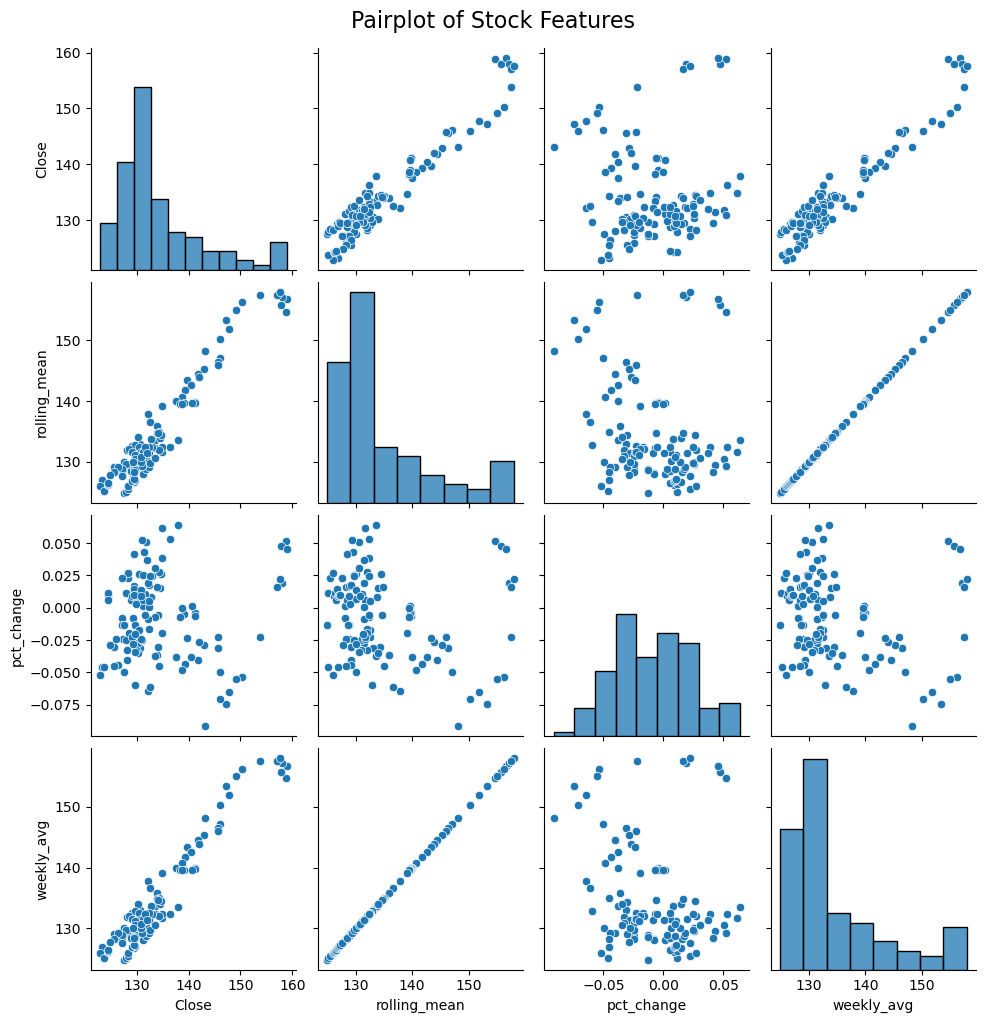

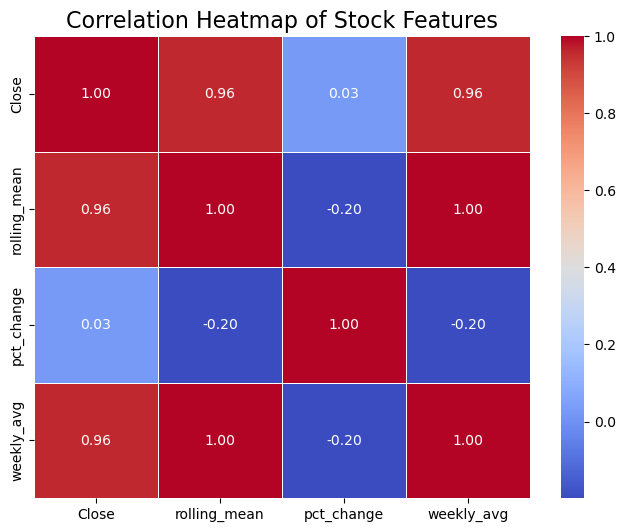

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of all features
sns.pairplot(df_features[["Close", "rolling_mean", "pct_change", "weekly_avg"]])
plt.suptitle("Pairplot of Stock Features", y=1.02, fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
corr = df_features[["Close", "rolling_mean", "pct_change", "weekly_avg"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Features", fontsize=16)
plt.show()